In [10]:
import time
import os
import numpy as np
from PIL import Image, ImageDraw
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

In [11]:
%run ../sqlite_execution.py
db2 = DB_V2(dir_prefix="../")
for captcha_string in os.listdir("../../data/images/v2/"):
    db2.add_untracked_images(captcha_string)

In [12]:
db2.get_info()

,total,solved,unsolved
dog,197,134,63
parrot,211,0,211
elephant,156,0,156
hedgehog,83,0,83
turtle,59,0,59
squirrel,28,0,28
thumbnail_that_is_not_an_animal,1,0,1


In [13]:
%run v2_training.py
model = Model_Training()

In [14]:
images = [Image.open("../../data/images/v2/"+path) for path in db2.get_solved_captchas(count=10)[0]]
pred = model.predict_pil(images)
pred

x shape: (10, 3, 333, 334)
[[0.4921098  0.5491749 ]
 [0.50074285 0.5447971 ]
 [0.50006354 0.5428744 ]
 [0.50569963 0.5506017 ]
 [0.4913896  0.54026765]
 [0.4927881  0.5320932 ]
 [0.4902685  0.52569634]
 [0.49499762 0.52157867]
 [0.48969874 0.5259883 ]
 [0.50077605 0.5356205 ]]


array([[164.36467499, 150.12475669],
       [167.2481128 , 151.58255821],
       [167.02122188, 152.22282618],
       [168.90367794, 149.64962697],
       [164.12412721, 153.09087378],
       [164.59122747, 155.81295544],
       [163.74967855, 157.9431197 ],
       [165.32920527, 159.31430304],
       [163.55937845, 157.8459025 ],
       [167.25920153, 154.63836998]])

In [15]:
model.train(db2, epochs=20)

image file is truncated
Could not load image: dog/13-13-08-28-988192.png
133
(500, 536)
Found 133 useable images
x shape: (133, 3, 333, 334)
y shape: (133, 2)
pos: (244, 264)
y: [0.73053892 0.20720721]
Sample 0:
 [[[0.92156863 0.92156863 0.92156863 ... 0.92156863 0.92156863 0.92156863]
  [0.92156863 0.92156863 0.92156863 ... 0.92156863 0.92156863 0.92156863]
  [0.92156863 0.92156863 0.92156863 ... 0.92156863 0.92156863 0.92156863]
  ...
  [0.92156863 0.92156863 0.5254902  ... 0.86666667 0.92156863 0.92156863]
  [0.92156863 0.92156863 0.90196078 ... 0.90588235 0.92156863 0.92156863]
  [0.92156863 0.92156863 0.92156863 ... 0.92156863 0.92156863 0.92156863]]

 [[0.92156863 0.92156863 0.92156863 ... 0.92156863 0.92156863 0.92156863]
  [0.92156863 0.92156863 0.92156863 ... 0.92156863 0.92156863 0.92156863]
  [0.92156863 0.92156863 0.92156863 ... 0.92156863 0.92156863 0.92156863]
  ...
  [0.92156863 0.92156863 0.58039216 ... 0.88235294 0.92156863 0.92156863]
  [0.92156863 0.92156863 0.901960

KeyboardInterrupt: 

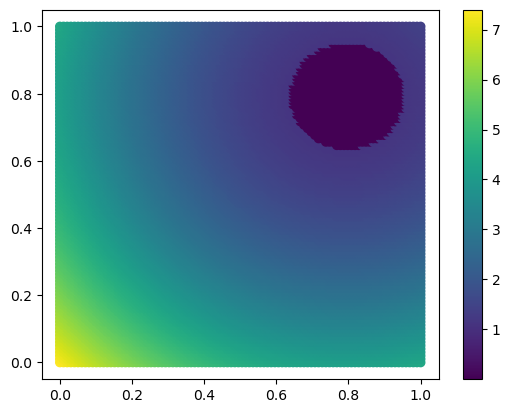

In [ ]:
inputs = np.linspace(0,1,100)
xx, yy = np.meshgrid(inputs, inputs)
coordinates = np.vstack([xx.ravel(), yy.ravel()]).T
coordinates_torch = torch.from_numpy(coordinates).float()
output = np.tile(np.array([0.8,0.8]), (len(coordinates),1))
output_torch = torch.from_numpy(output).float()
# get loss of coordinates by EuclideanDistanceLoss
squared_diff = (output_torch - coordinates_torch) ** 2  
sum_squared_diff = torch.sum(squared_diff, dim=1)  

euclidean_distance = sum_squared_diff
scaled_distance = torch.where(euclidean_distance < 0.025, euclidean_distance*0.2, (5*euclidean_distance) + 1)
loss = scaled_distance.detach().numpy()
from matplotlib import pyplot as plt
plt.scatter(coordinates[:,0], coordinates[:,1], c=loss)
plt.colorbar()

[[0.         0.        ]
 [0.01010101 0.01010101]
 [0.02020202 0.02020202]
 [0.03030303 0.03030303]
 [0.04040404 0.04040404]
 [0.05050505 0.05050505]
 [0.06060606 0.06060606]
 [0.07070707 0.07070707]
 [0.08080808 0.08080808]
 [0.09090909 0.09090909]
 [0.1010101  0.1010101 ]
 [0.11111111 0.11111111]
 [0.12121212 0.12121212]
 [0.13131313 0.13131313]
 [0.14141414 0.14141414]
 [0.15151515 0.15151515]
 [0.16161616 0.16161616]
 [0.17171717 0.17171717]
 [0.18181818 0.18181818]
 [0.19191919 0.19191919]
 [0.2020202  0.2020202 ]
 [0.21212121 0.21212121]
 [0.22222222 0.22222222]
 [0.23232323 0.23232323]
 [0.24242424 0.24242424]
 [0.25252525 0.25252525]
 [0.26262626 0.26262626]
 [0.27272727 0.27272727]
 [0.28282828 0.28282828]
 [0.29292929 0.29292929]
 [0.3030303  0.3030303 ]
 [0.31313131 0.31313131]
 [0.32323232 0.32323232]
 [0.33333333 0.33333333]
 [0.34343434 0.34343434]
 [0.35353535 0.35353535]
 [0.36363636 0.36363636]
 [0.37373737 0.37373737]
 [0.38383838 0.38383838]
 [0.39393939 0.39393939]


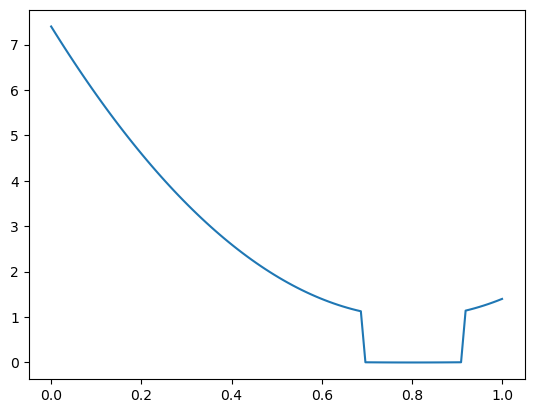

In [ ]:
coords = np.repeat(np.linspace(0,1,100).reshape(-1,1),2, axis=1)
print(coords)
target = np.repeat([[0.8,0.8]], 100, axis=0)
print(target)
squared_diff = (torch.Tensor(target) - torch.tensor(coords)) ** 2  
sum_squared_diff = torch.sum(squared_diff, dim=1)  

euclidean_distance = sum_squared_diff
scaled_distance = torch.where(euclidean_distance < 0.025, euclidean_distance*0.2, (5*euclidean_distance) + 1)
loss = scaled_distance.detach().numpy()
print(loss)
from matplotlib import pyplot as plt
plt.plot(coords[:,0], loss)


In [ ]:
%run v2_training.py
images = [Image.open("../../data/images/v2/"+path) for path in db2.get_solved_captchas(count=10)[0]]
pred = model.predict_pil(images)
pred

x shape: (10, 3, 333, 334)
[[0.705956   0.21247603]
 [0.26725304 0.62878793]
 [0.2893878  0.758856  ]
 [0.6910361  0.23131554]
 [0.70309585 0.29345447]
 [0.7554774  0.20232604]
 [0.49034405 0.4330813 ]
 [0.30164647 0.5229734 ]
 [0.67432004 0.75861704]
 [0.3640749  0.28200963]]


array([[235.78929806, 262.24548697],
       [ 89.26251578, 123.61361772],
       [ 96.65552264,  80.30095249],
       [230.80605912, 255.97192079],
       [234.83401501, 235.27966207],
       [252.3294611 , 265.62542224],
       [163.77491188, 188.78393734],
       [100.74992132, 158.84985173],
       [225.22289407,  80.38052452],
       [121.60101187, 239.09080267]])

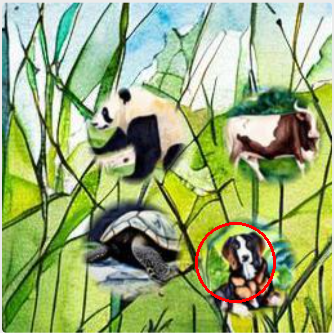

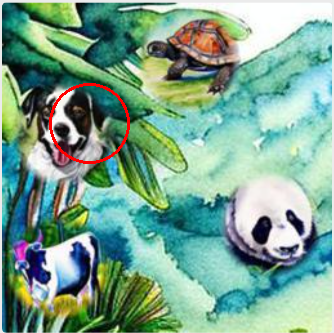

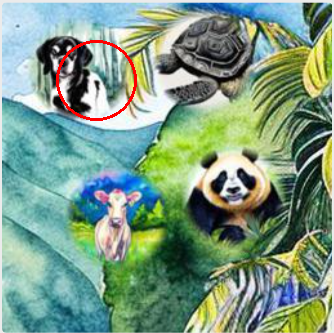

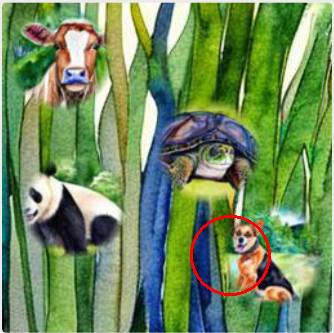

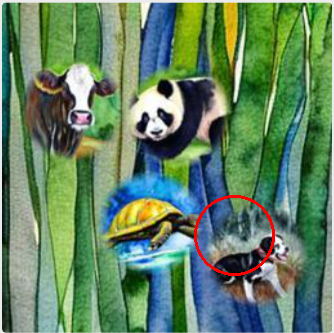

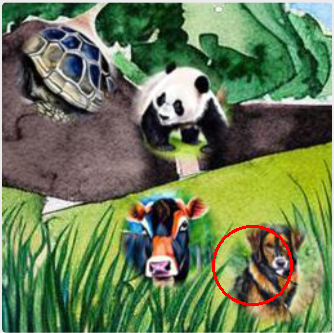

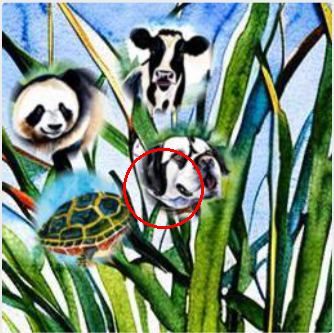

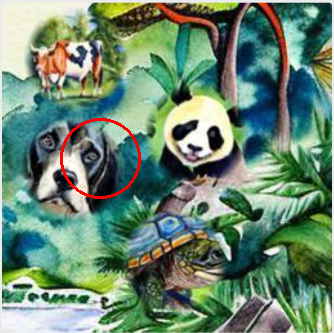

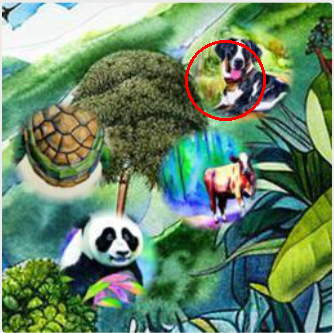

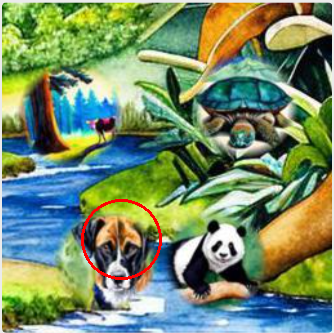

In [ ]:
%run v2_handler.py
for i in range(len(images)):
    display_image_with_circle(images[i], pred[i])

In [ ]:
assert 1 == 0

AssertionError: 

Setting images for dog
(500, 536)


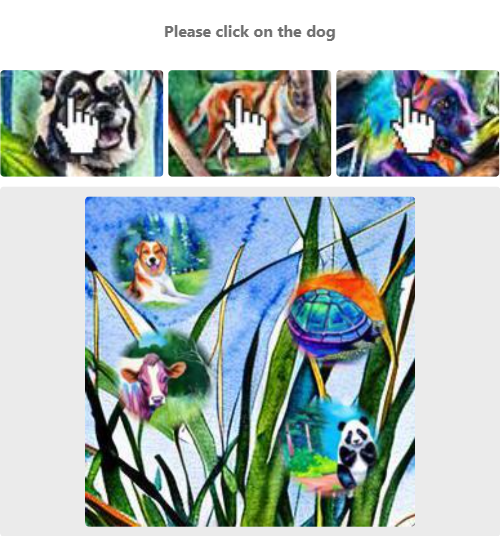

KeyboardInterrupt: 

In [ ]:
%run v2_manual_classifier.py
Manual_Classifier(db2)

In [ ]:
# db2.con.execute("DROP TABLE IF EXISTS captchas_v2")
# db2.commit()
db2.add_untracked_images("elephant")

Added 12 untracked images


In [ ]:
from selenium import webdriver

options = webdriver.ChromeOptions()
options.add_argument("--enable-features=DarkMode")
# options.add_argument("--headless")

wd = webdriver.Chrome(options)
wd.get("https://accounts.hcaptcha.com/demo")

In [ ]:
image_paths = db2.get_unsolved_captchas()
for i in range(len(image_paths)):
    image = Image.open("../"+image_paths[i])
    
    display(image)

FileNotFoundError: [Errno 2] No such file or directory: '../dog/13-13-34-10-609333.png'

In [ ]:
%run v2_handler.py
v2h = V2_Handler(db2)
v2h.solve_v2(wd)